# ML model for prediction of Cab Prices

Taking a look at the data using pandas :

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
def loadData(path):
    csvPath = os.path.join(path,'taxi_trip_pricing.csv')
    return pd.read_csv(csvPath)
cabDataFrame = loadData("/Users/alakhsharma/Desktop/docs/programing books/Projects/cabPricePredictionsMLModel")
cabDataFrame.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


Each row in the dataframe represents the data for a cab ride.

Length of the dataset :

In [4]:
len(cabDataFrame)

1000

Getting a quick description of the data :

In [5]:
cabDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


For all the objects, lets get some analysis :

In [6]:
cabDataFrame["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [7]:
cabDataFrame["Day_of_Week"].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [8]:
cabDataFrame["Traffic_Conditions"].value_counts()

Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

In [9]:
cabDataFrame["Weather"].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

Hence, these objects also have sub-classes within them.

Now, getting the summary of the dataset :

In [10]:
cabDataFrame.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


For getting a clear picture, plotting the data on graphs :

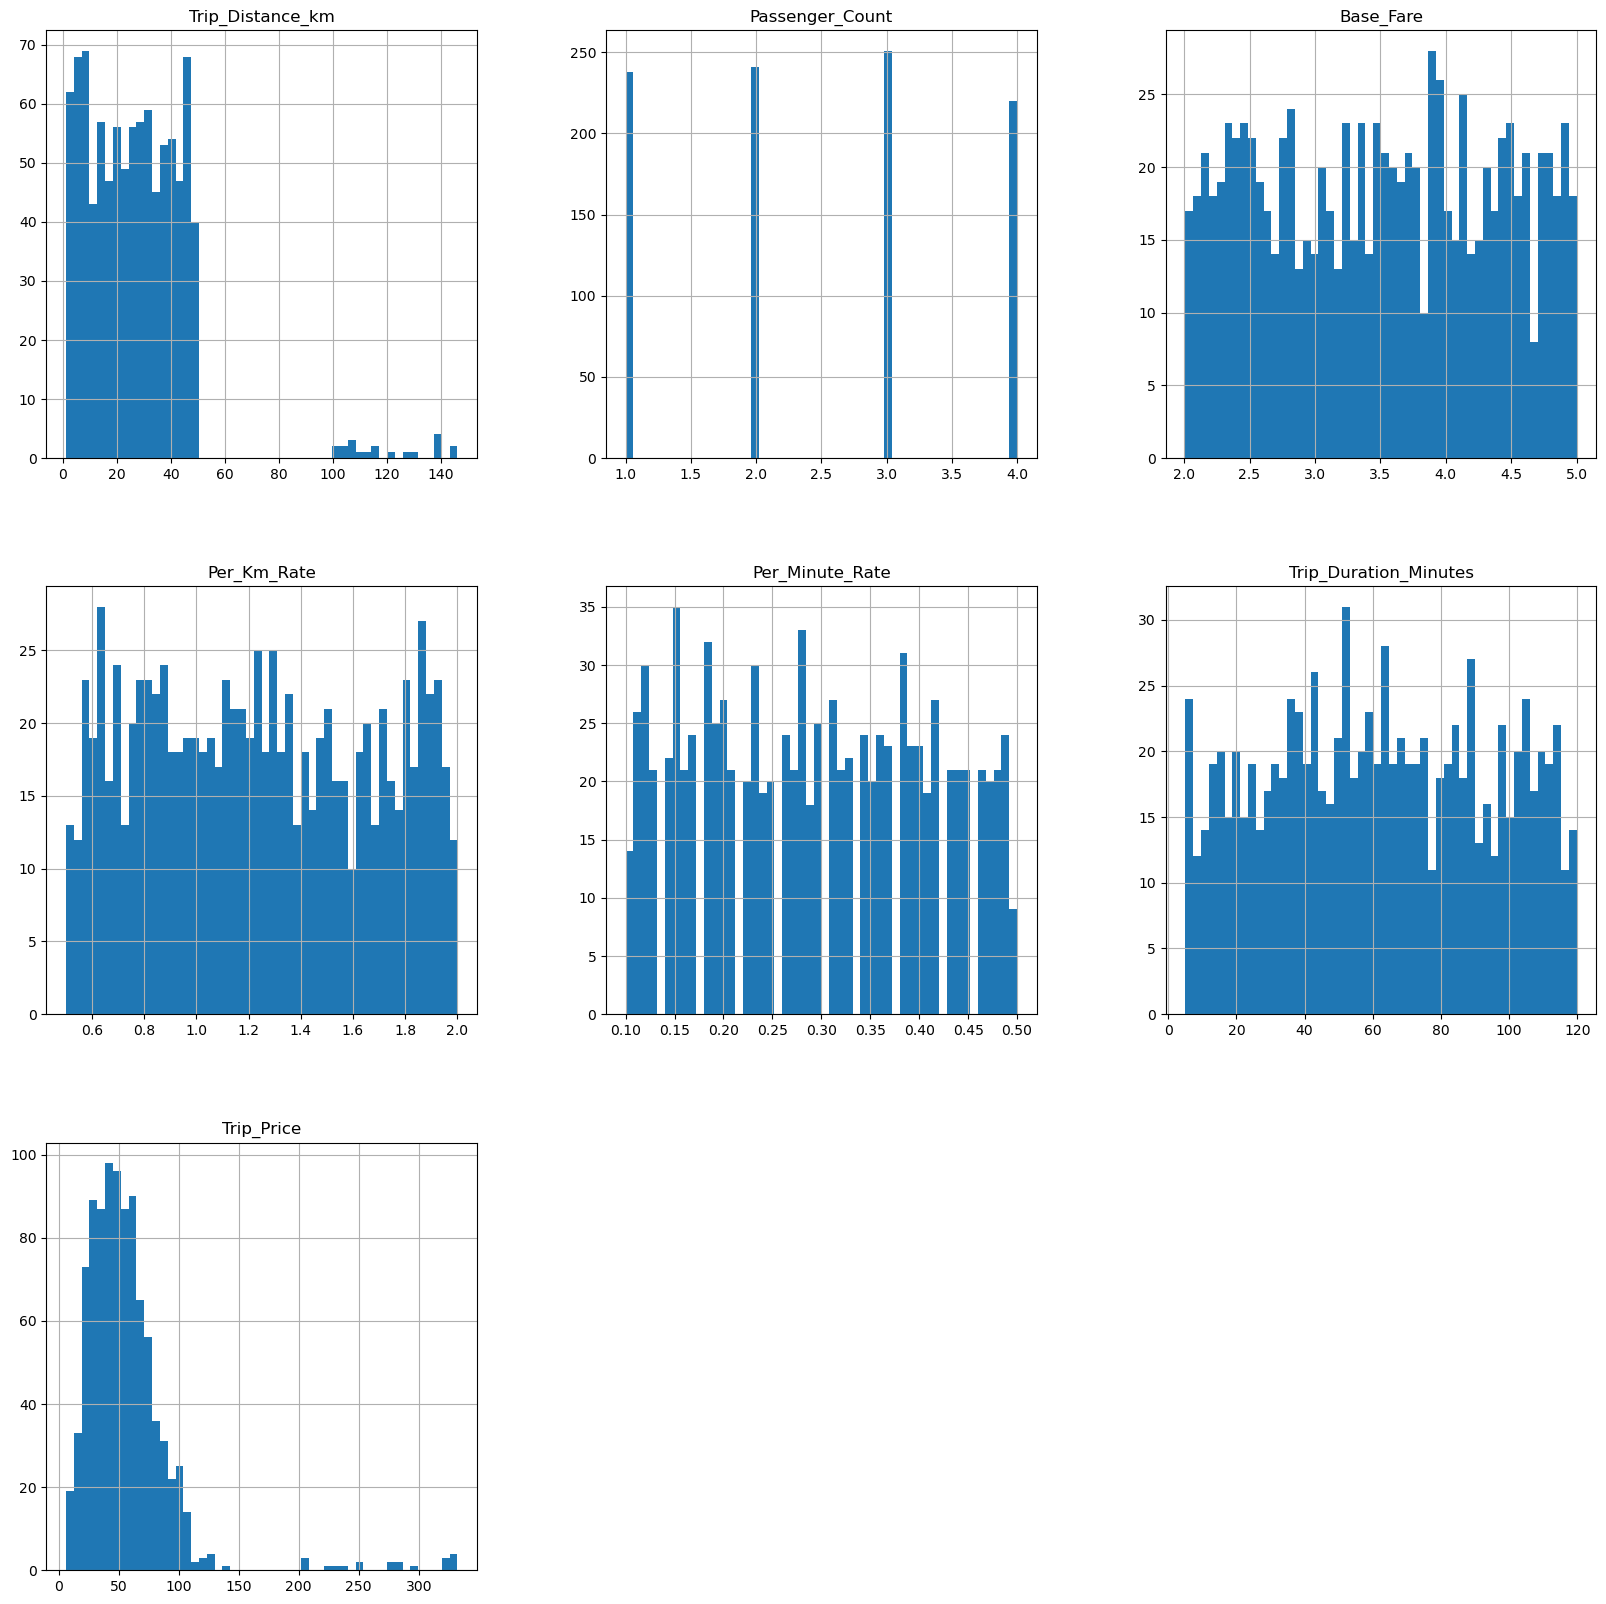

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
cabDataFrame.hist(bins = 50, figsize=(20,20))
plt.show()

Visualization of the dataset :

1. Histogram for the total fare of the rides :

In [12]:
import seaborn as sns

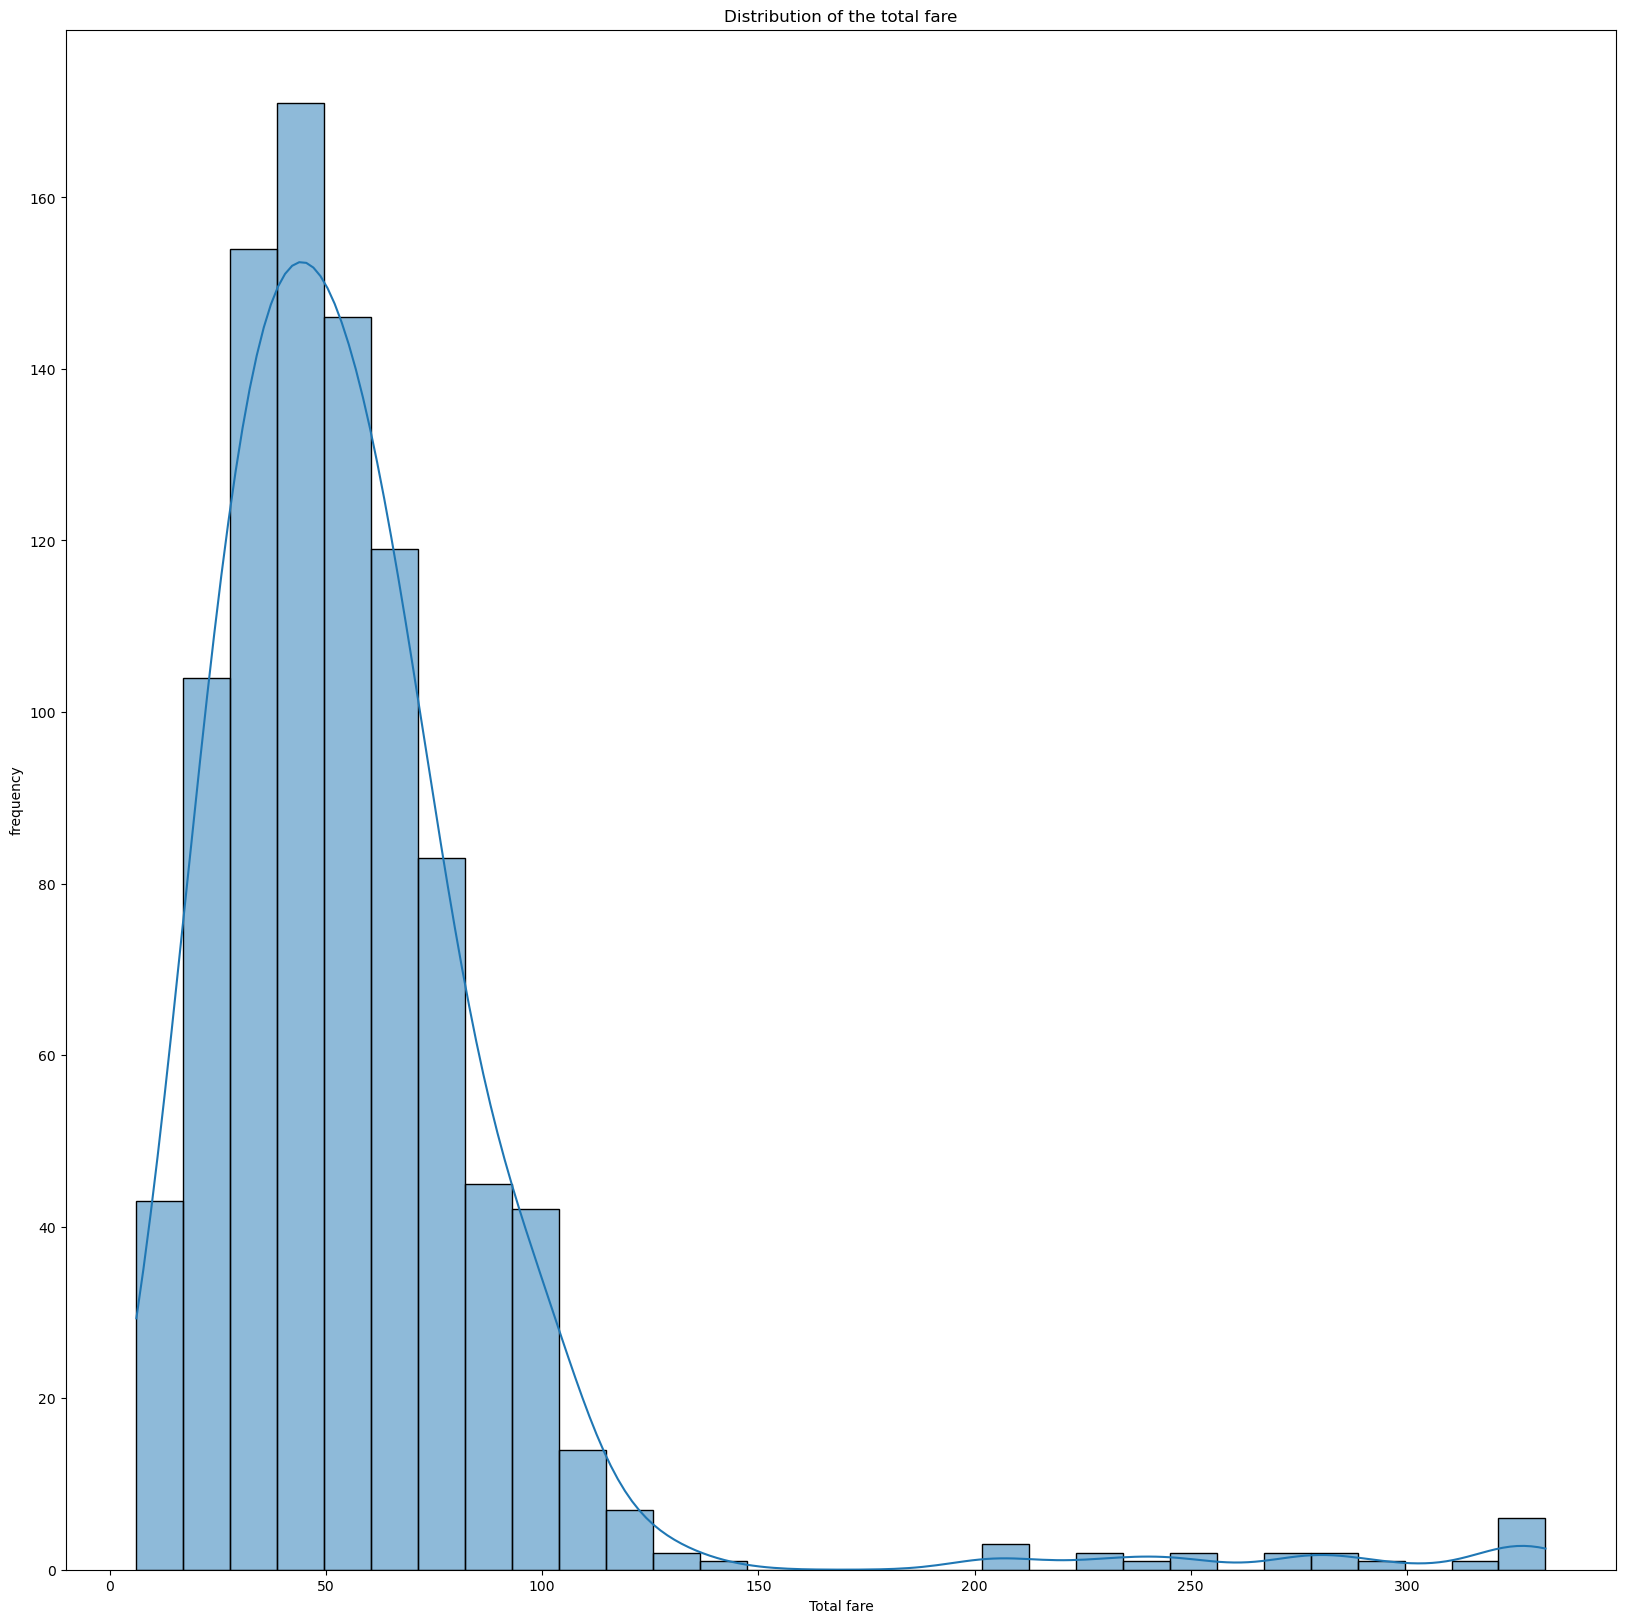

In [13]:
plt.figure(figsize=(20,20))
sns.histplot(cabDataFrame['Trip_Price'], kde=True, bins=30)
plt.title('Distribution of the total fare')
plt.xlabel('Total fare')
plt.ylabel('frequency')
plt.show()

This shows that there is indeed a skewness in the data.

2. Categorial features :

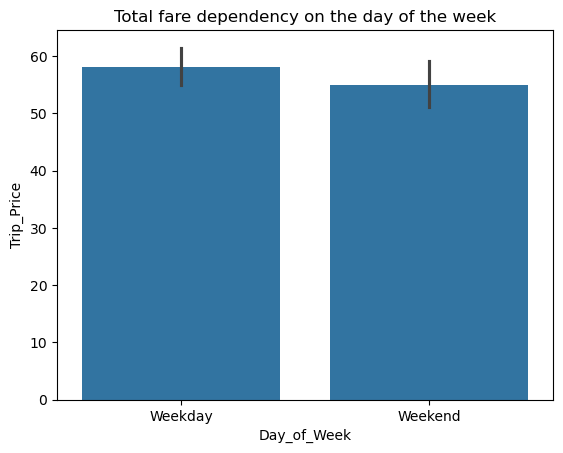

In [14]:
sns.barplot(x='Day_of_Week', y='Trip_Price', data=cabDataFrame)
plt.title('Total fare dependency on the day of the week')
plt.show()

3. Distance plot :

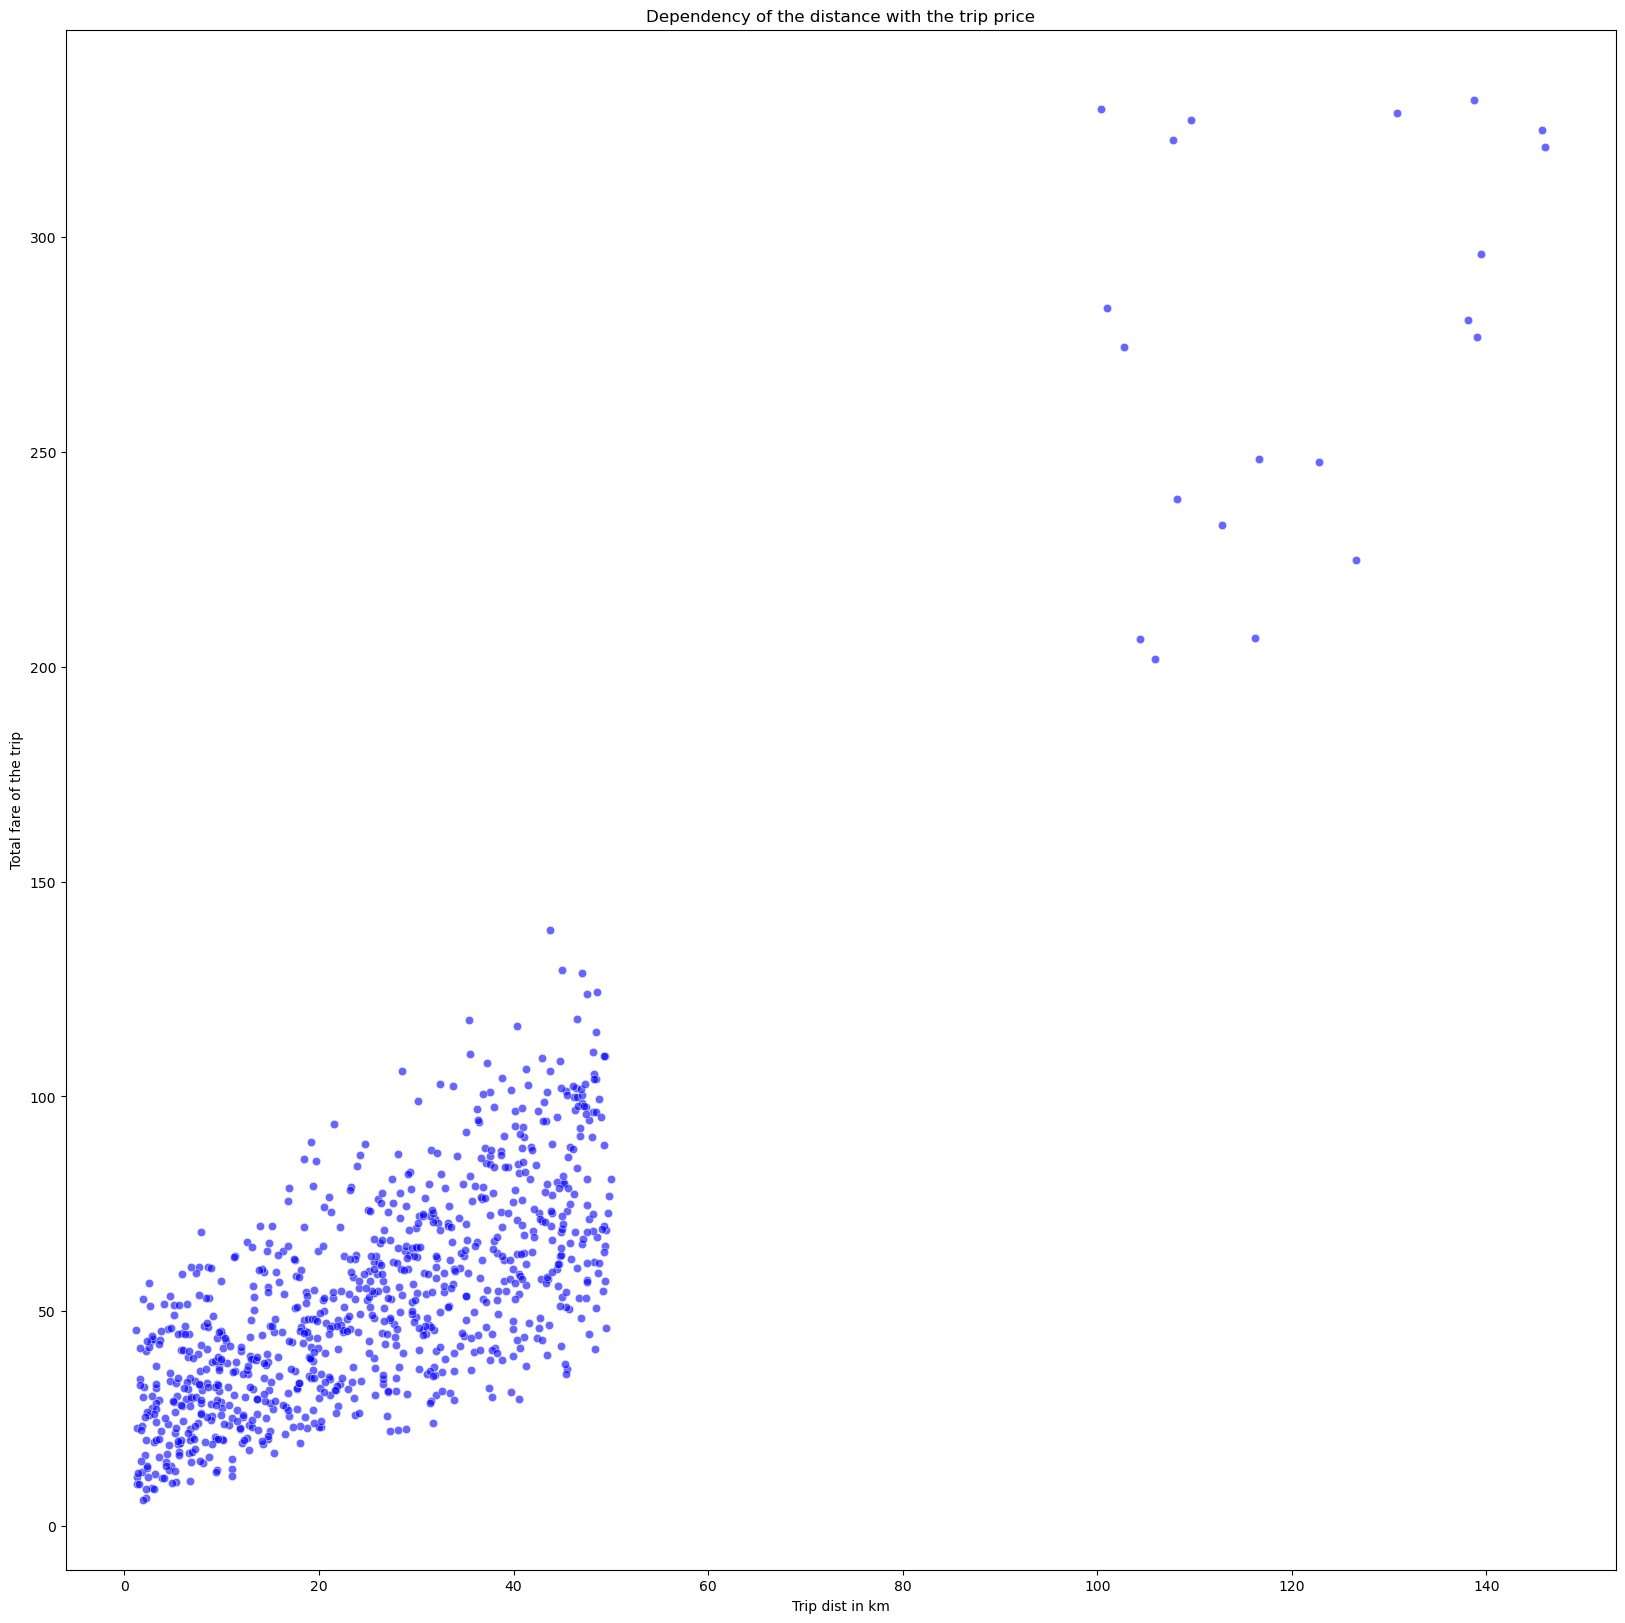

In [15]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=cabDataFrame, alpha=0.6, color='blue')
plt.title("Dependency of the distance with the trip price")
plt.xlabel('Trip dist in km')
plt.ylabel('Total fare of the trip')
plt.show()

This shows that there is a skewness in the data.

Now, applying log transformations so as to remove the skewness in the data, as it will affect the ML model's training :

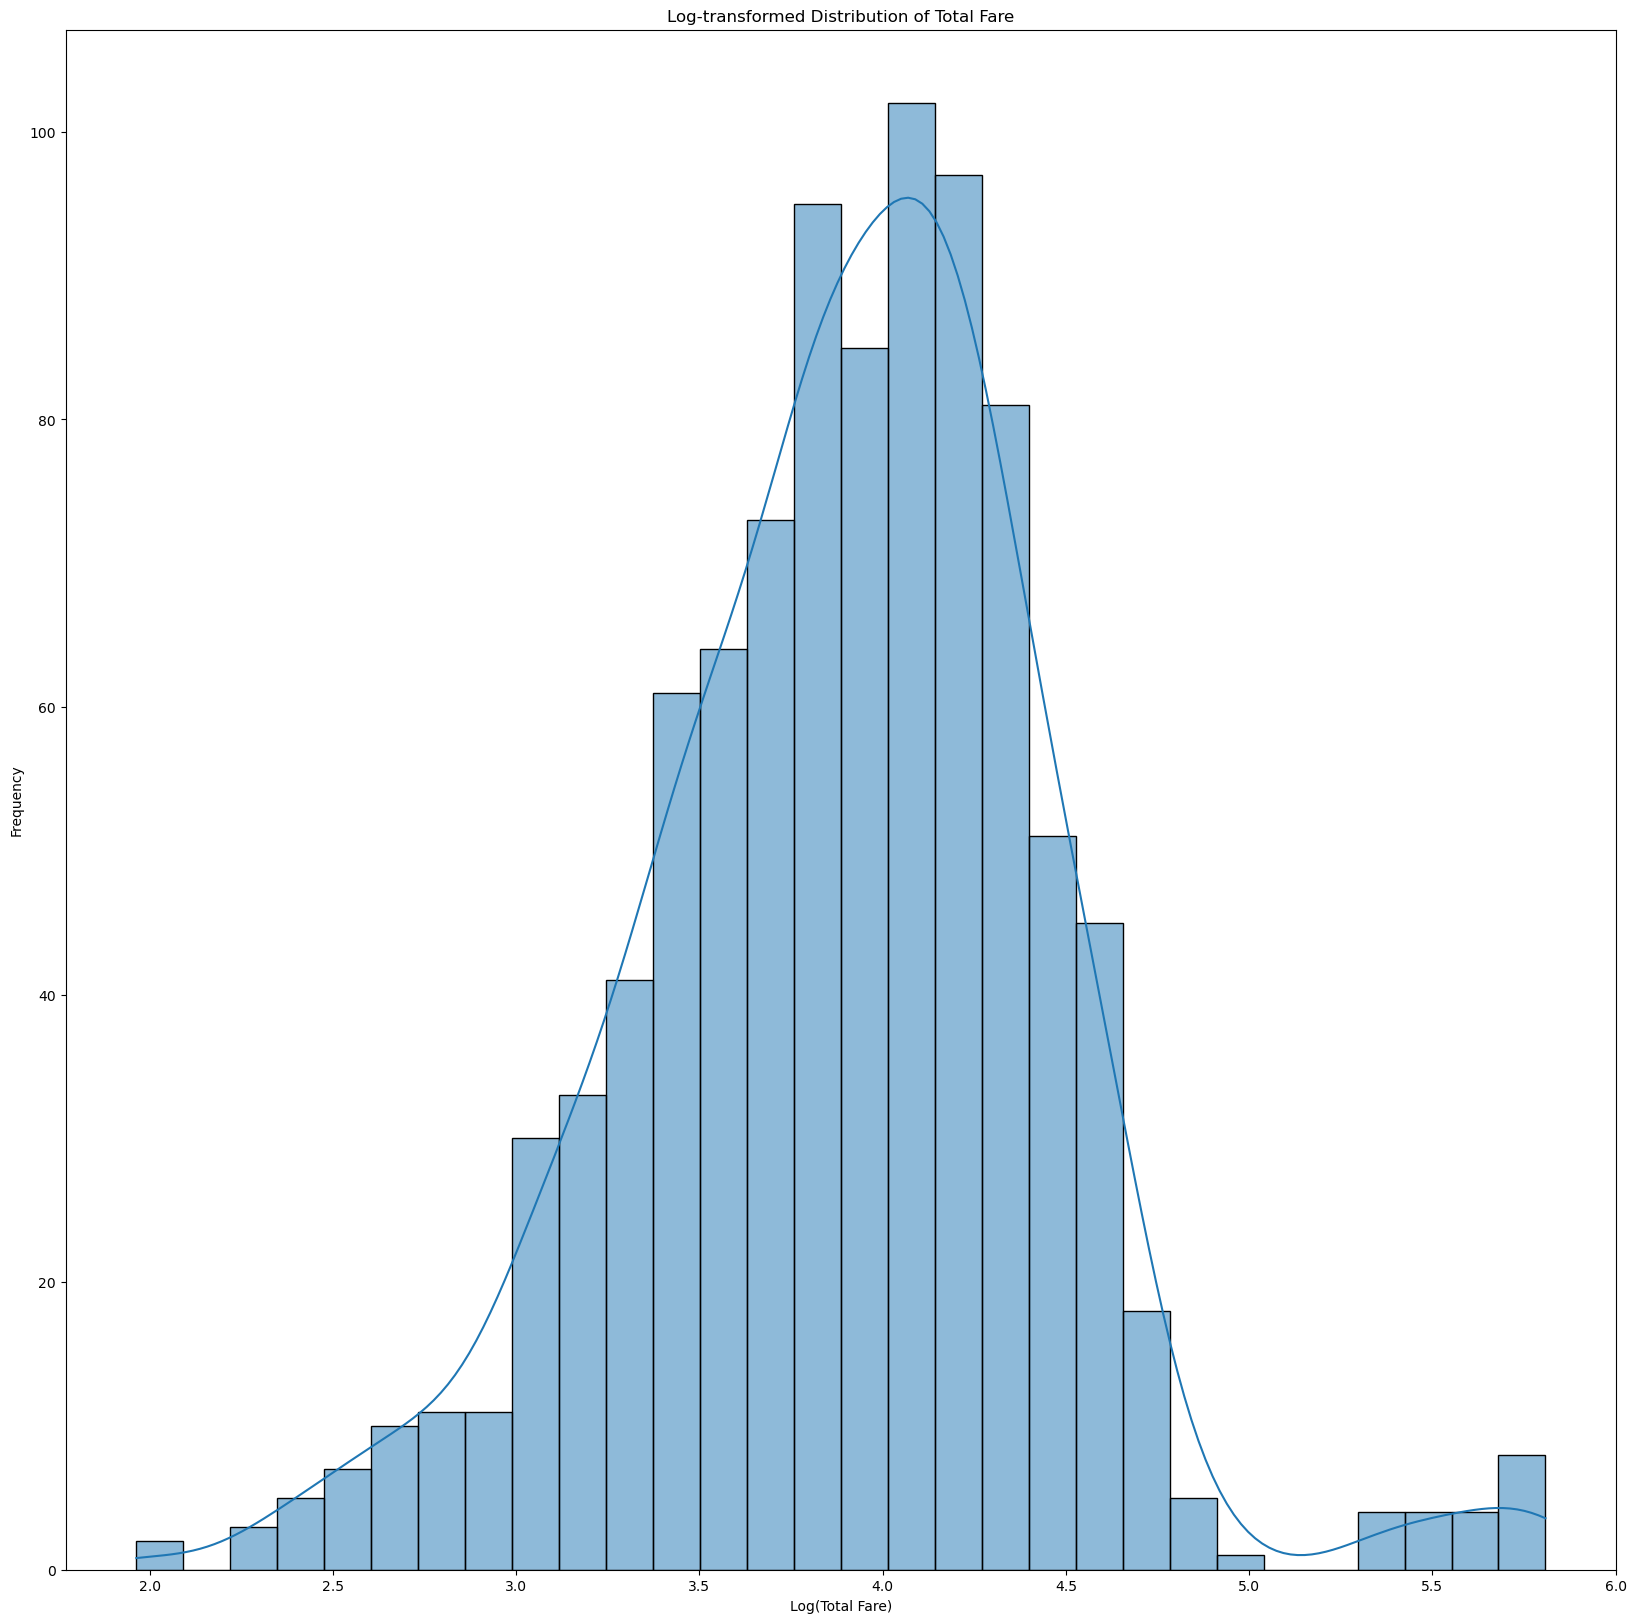

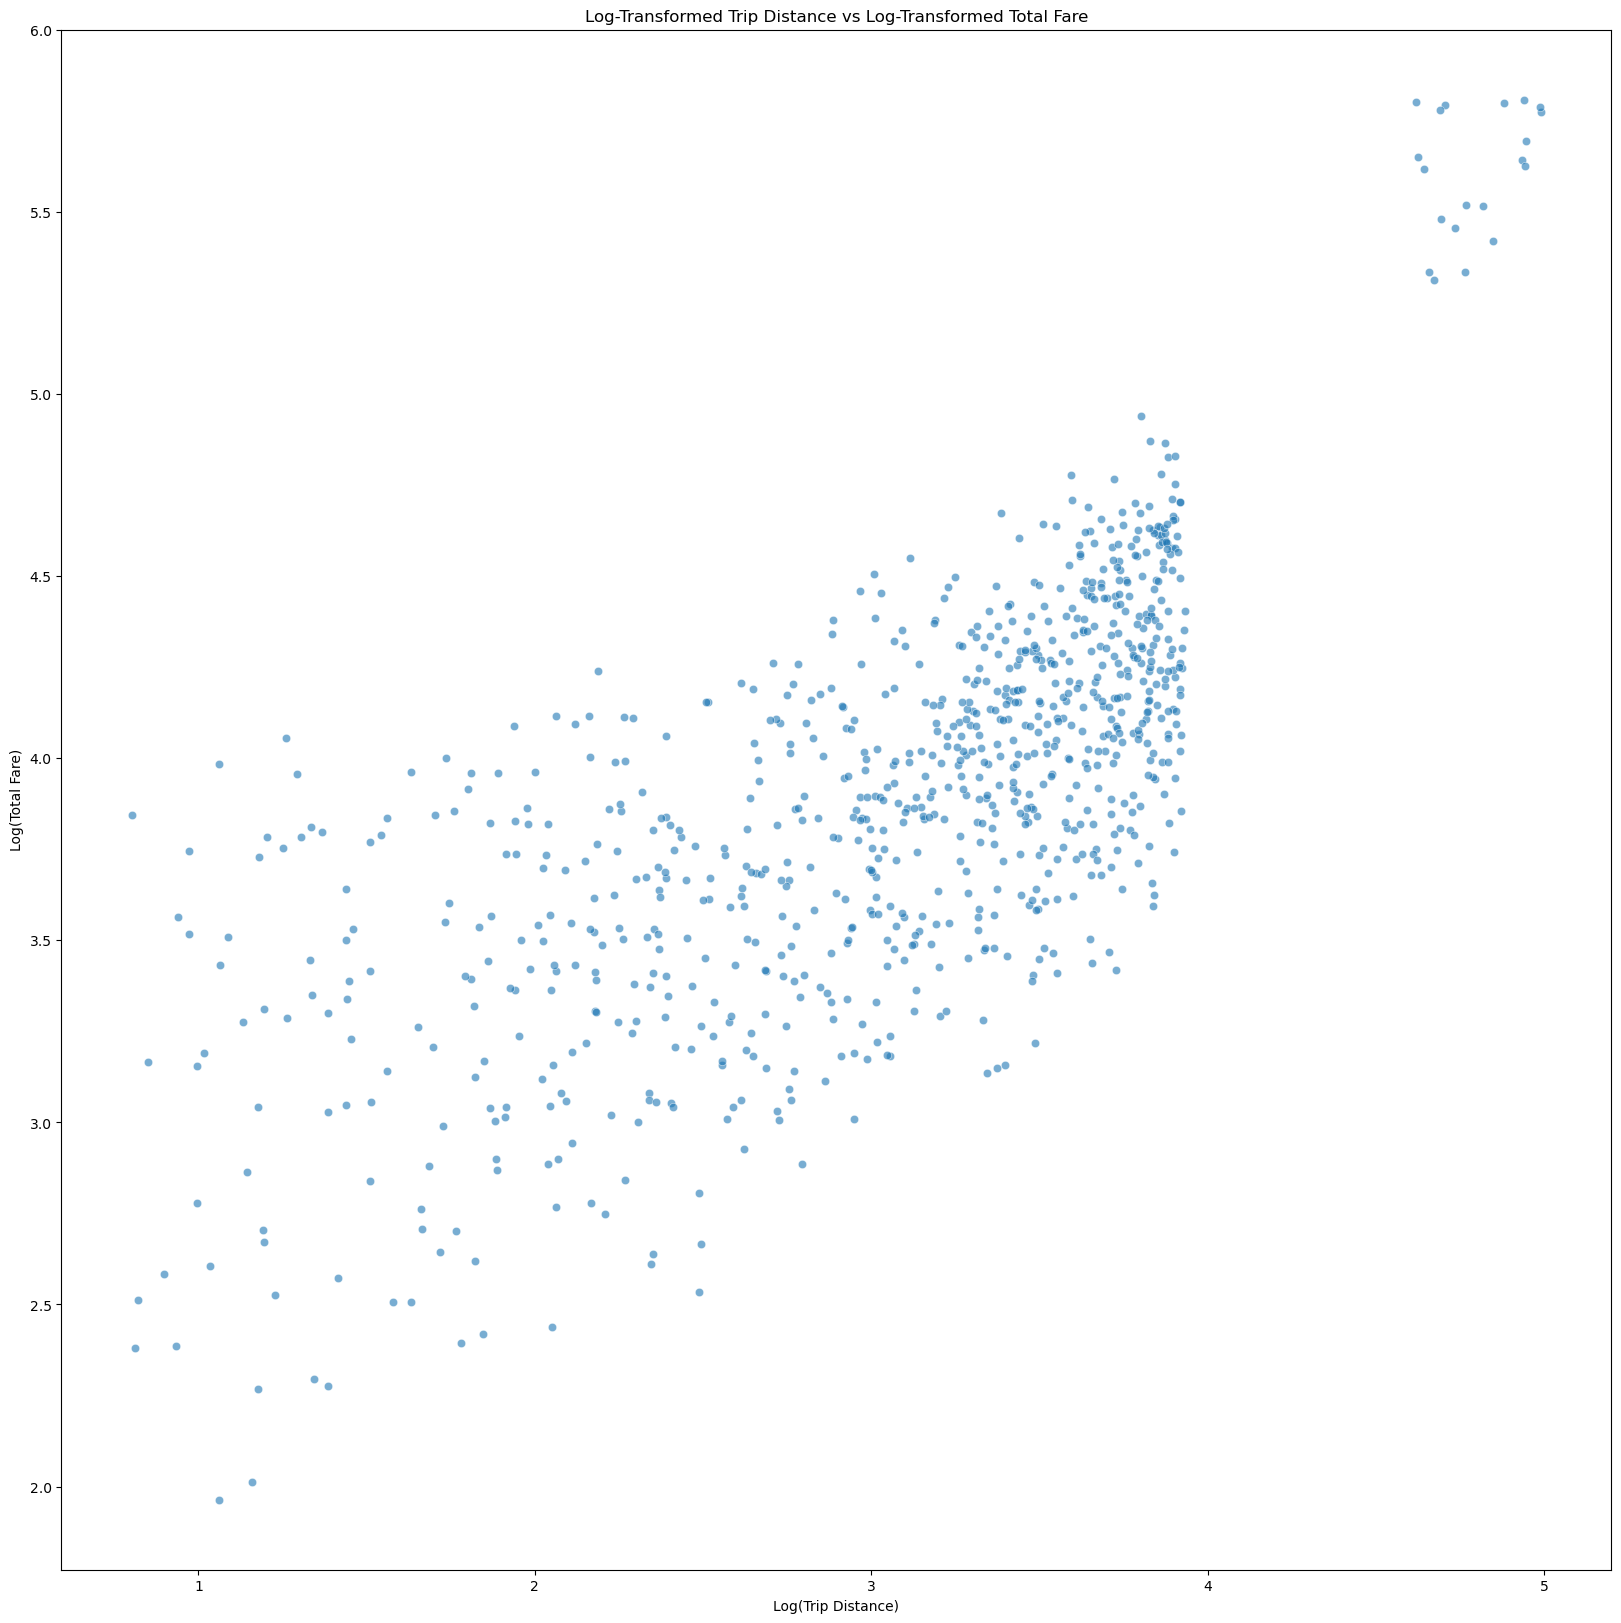

In [16]:
# Apply log transformation (with a small offset to avoid taking the log of zero)
cabDataFrame['log_total_fare'] = np.log(cabDataFrame['Trip_Price'] + 1)  # Adding 1 to avoid log(0)
cabDataFrame['log_trip_distance'] = np.log(cabDataFrame['Trip_Distance_km'] + 1)  # Same for trip distance if needed

# Plot histogram for log-transformed total fare
plt.figure(figsize=(20, 20))
sns.histplot(cabDataFrame['log_total_fare'], kde=True, bins=30)
plt.title('Log-transformed Distribution of Total Fare')
plt.xlabel('Log(Total Fare)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for log-transformed total fare vs log-transformed trip distance
plt.figure(figsize=(20, 20))
sns.scatterplot(x='log_trip_distance', y='log_total_fare', data=cabDataFrame, alpha=0.6)
plt.title('Log-Transformed Trip Distance vs Log-Transformed Total Fare')
plt.xlabel('Log(Trip Distance)')
plt.ylabel('Log(Total Fare)')
plt.show()

Still, there is a skewness.
Hence, using robust-scaling for removing the skewness :

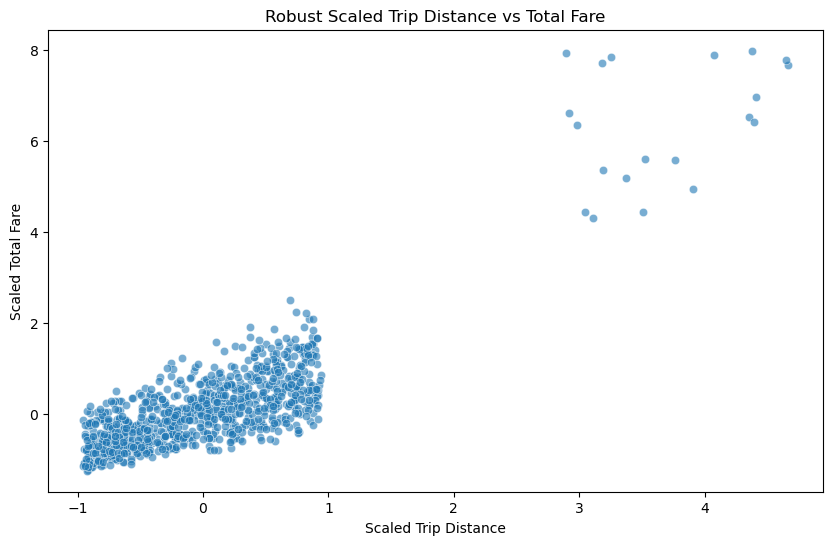

In [17]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Apply RobustScaler to 'trip_distance' and 'total_fare'
cabDataFrame[['scaled_trip_distance', 'scaled_total_fare']] = scaler.fit_transform(cabDataFrame[['Trip_Distance_km', 'Trip_Price']])

# Visualize the scaled features with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='scaled_trip_distance', y='scaled_total_fare', data=cabDataFrame, alpha=0.6)
plt.title('Robust Scaled Trip Distance vs Total Fare')
plt.xlabel('Scaled Trip Distance')
plt.ylabel('Scaled Total Fare')
plt.show()

Now, as the train set is robusted, there is no issue of the extreme points, models will take care of it.

Now, looking for correlations in data using Pearson's ratio :

In [18]:
corrMatrix = cabDataFrame.corr(numeric_only=True)
corrMatrix['Trip_Price'].sort_values(ascending = False)

Trip_Price               1.000000
scaled_total_fare        1.000000
log_total_fare           0.862766
scaled_trip_distance     0.849123
Trip_Distance_km         0.849123
log_trip_distance        0.617708
Per_Km_Rate              0.275135
Trip_Duration_Minutes    0.221211
Per_Minute_Rate          0.141226
Base_Fare                0.035533
Passenger_Count         -0.014223
Name: Trip_Price, dtype: float64

The above correlation matrix data suggests that the trip distance is the main factor for the cab price for a trip.

Now, preparing the data for machine learning models and algorithms :

1. Numerical attributes :

Checking for the missing values in the Dataset : (Replacing them with the mean)

In [19]:
cabDataFrame['Trip_Distance_km'].fillna(cabDataFrame['Trip_Distance_km'].mean(), inplace=True)
cabDataFrame['Trip_Price'].fillna(cabDataFrame['Trip_Price'].mean(), inplace=True)

This is done only for the distance and total fare, as due to the highest correlation value.

In [20]:
cabDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             1000 non-null   float64
 11  log_total_fare         951 non-null    float64
 12  log_trip_distance      950 non-null    float64
 13  scaled_trip_distance   950 non-null    float64
 14  scaled_total_fare      951 non-null    float64
dtypes: fl

2. Categorial attributes (The objects):

Playing a hunch, taking the weather as the more important, hence using one-hot encoding for these tasks :

(Else, we would have used Label Encoding for this task if Days was more important)

In [21]:
cabDataFrame = pd.get_dummies(cabDataFrame, columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'],drop_first=True)

In [22]:
cabDataFrame.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,log_total_fare,log_trip_distance,scaled_trip_distance,scaled_total_fare,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.56,0.80,0.32,53.82,36.262400,3.617985,3.013081,-0.251431,-0.390650,False,True,False,False,True,False,False,False
1,47.590000,1.0,NaN,0.62,0.43,40.57,56.874773,NaN,3.883418,0.844311,NaN,False,False,False,False,False,False,False,False
2,36.870000,1.0,2.70,1.21,0.15,37.27,52.903200,3.987190,3.634159,0.428364,0.080005,True,False,False,True,False,False,False,False
3,30.330000,4.0,3.48,0.51,0.15,116.81,36.469800,3.623535,3.444576,0.174605,-0.384784,True,False,False,False,True,False,False,False
4,27.070547,3.0,2.93,0.63,0.32,22.64,15.618000,2.810486,NaN,NaN,-0.974539,True,False,False,False,False,False,False,False


Now, filling the null values with their mode and then training the Random Forest Regressor model :

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded your cabDataFrame and preprocessed categorical columns

# Step 1: Preprocess data (already performed by you)
# Split the data into features (X) and target (y)
X = cabDataFrame.drop('Trip_Price', axis=1)
y = cabDataFrame['Trip_Price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply One-Hot Encoding to categorical variables (if not done already)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Step 4: Align columns between train and test sets (to handle missing columns in one-hot encoding)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 5: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on X_train and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Transform X_test (without fitting)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed data back into DataFrames with the same columns
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Step 6: Feature scaling (optional but recommended for some models, especially for gradient-based ones)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
predictions = rf_model.predict(X_test_scaled)

# Step 9: Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Optional: Feature importance analysis (if needed)
importances = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Mean Absolute Error (MAE): 0.49283162785855494
Mean Squared Error (MSE): 11.944525028392063
R² Score: 0.9856153151460183

Feature Importances:
                      Feature  Importance
6              log_total_fare    0.281057
9           scaled_total_fare    0.254517
8        scaled_trip_distance    0.177023
7           log_trip_distance    0.145209
0            Trip_Distance_km    0.139089
5       Trip_Duration_Minutes    0.001379
3                 Per_Km_Rate    0.000622
14     Traffic_Conditions_Low    0.000311
16               Weather_Rain    0.000301
2                   Base_Fare    0.000140
4             Per_Minute_Rate    0.000085
10        Time_of_Day_Evening    0.000073
1             Passenger_Count    0.000060
15  Traffic_Conditions_Medium    0.000048
13        Day_of_Week_Weekend    0.000044
11        Time_of_Day_Morning    0.000034
12          Time_of_Day_Night    0.000003
17               Weather_Snow    0.000002


The model is 98% understanding the variances (good).

Prediction using the model :

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a trained Random Forest model named 'rf_model'
# Also assuming you have the pre-trained scaler ('scaler') and imputer ('imputer')

# Function to preprocess user input and make a prediction
def preprocess_and_predict(user_input):
    # Step 1: Convert user input into a DataFrame (assuming input is a dictionary)
    user_df = pd.DataFrame([user_input])

    # Step 2: One-hot encode categorical variables (similar to how you did for training data)
    user_df = pd.get_dummies(user_df, columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], drop_first=True)

    # Step 3: Align the columns of the user input to match the training data (same columns as in X_train)
    user_df = user_df.reindex(columns=X_train.columns, fill_value=0)  # Assuming X_train is available

    # Step 4: Impute missing values if any (using SimpleImputer)
    user_df_imputed = imputer.transform(user_df)  # imputer should have been trained on the training data

    # Step 5: Scale the features (using StandardScaler or RobustScaler)
    user_df_scaled = scaler.transform(user_df_imputed)  # scaler should have been trained on the training data

    # Step 6: Use the trained model to predict the trip price
    predicted_trip_price = rf_model.predict(user_df_scaled)

    return predicted_trip_price[0]  # Return the predicted value

# Function to collect user input
def collect_user_input():
    # Step 1: Collect input data from the user for each feature
    user_input = {}

    user_input['Trip_Distance_km'] = float(input("Enter the Trip Distance (in km): "))
    user_input['Time_of_Day'] = input("Enter the Time of Day (Morning, Evening, Night): ")
    user_input['Day_of_Week'] = input("Enter the Day of Week (Weekday, Weekend): ")
    user_input['Passenger_Count'] = int(input("Enter the Passenger Count: "))
    user_input['Traffic_Conditions'] = input("Enter Traffic Conditions (Low, Medium, High): ")
    user_input['Weather'] = input("Enter Weather (Clear, Rain, Snow): ")
    user_input['Base_Fare'] = float(input("Enter the Base Fare: "))
    user_input['Per_Km_Rate'] = float(input("Enter the Per Km Rate: "))
    user_input['Per_Minute_Rate'] = float(input("Enter the Per Minute Rate: "))
    user_input['Trip_Duration_Minutes'] = float(input("Enter the Trip Duration (in minutes): "))

    return user_input

# Main function to collect input and make a prediction
def main():
    # Step 1: Collect user input
    user_input = collect_user_input()

    # Step 2: Preprocess the input and make the prediction
    predicted_price = preprocess_and_predict(user_input)

    # Step 3: Output the predicted trip price
    print(f"The predicted trip price is: {predicted_price:.2f} (currency)")

# Run the main function to interact with the user
if __name__ == "__main__":
    main()

The predicted trip price is: 40.52 (currency)


/opt/anaconda3/envs/learning_ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


------